# **Multimodal_RAG_Image_text_table_summarize_Langchain_Chrom(GPT4V_GeminiProV)**

- Here we built **MultiModal RAG** using **Unstructured partition** package
- Applied **ChromDB indexing on Summarized Text/Image/Table** using **Gemini or openAI embedding**
- Used **Langchains MultivectorRetrival** Approach to retrive the vector DB
- Used Multimodal **GPT 4V or Gemini Pro vision** as Final LLM Model. Created **RAG Chain** on that

## Best Multimodal Langchain link:
- https://blog.langchain.dev/semi-structured-multi-modal-rag/

## **Architecture**
  ![plot](images/Architecture_1.png)

## **Colab Folder**
  ![plot](images/Colab_folder_2.png)
  ![plot](images/Extracted_image_yolo_5.png)

### **Install Package by PIP Install and sudo apt install**
- pip is used to install python packages only, but apt-get is used to install packages created in any programming language.
- **Canonical/sudo apt** only hosts a **single version of any package** (generally the **latest** or the one released in recent past). So, with apt-get we cannot decide the version of python-package that we want. pip helps us in this situation.In **Pip** We can install **any version** of the package that has previously been uploaded on PyPI.
- apt-get installs python modules in **system-wide location.** We cannot just install modules in our project virtualenv. pip solves this problem for us. As mentioned in previous point, if there is a version of a **particular python package already installed in system-wide location**, and one of our project requires an **older version** of the same python package, in **such situations we can use virtualenv and pip to install** that older version of python package without any conflicts.



- This give you the right name for the package you want to install
  - apt-cache search pyudev
  - pip search pyudev



# **STEP FOLLOWED:**

### **1. Data Parsing and Preprocessing**
- Create Folder - data and upload pdf in folders
- Use **partition_pdf** reader to read **unstructured file**
	- In below process, it reads text , image and tabular data with different element name like Header/Footer/Narrative text/ListItem, image, table respectively.
	- Here it reads table also as image.
	- Here it captures image and tables as image in specified folder and it holds text converted info of image and tabular


- **Sample Image with extracted detail in tesxt**
  ![plot](images/Extracted_image_4.png)
  ![plot](images/Extracted_image_yolo_5.1.png)

- Append each element(Text/Table/Image) to sepearate list


### **2. Start Summary(Convert to text) on each element(Text/Image/Table) Using Gemini Pro Vision Or OpenAI GPT4 Vision**, We dont have gpt 4V access, so using Gemin pro V Model (Connect to Gemini Pro Vision)
	- Get All **(Text/Table/Image)**  Summary by Prompt individually

 - **Sample Extracted Table**
  ![plot](images/Extracted_table_3.png)
  ![plot](images/Extracted_table_yolo_6.png)

- **Sample Image with summary**

  ![plot](images/Extracted_image_yolo_7.png)

### **3. Creating VectorDB and MultiVector Retriever**
- Here **Index** created on **summarized Text/Table/Image data** to Vector DB **Chroma**
- Then use Langchain **MultiVectorRetriever** to retrive the context of text and image
	- Function: Create retriever that indexes summaries, but returns raw images or texts
	- Create Chroma vectore db in memory with name - **mm_rag** by passing **OpenAIEmbeddings() or Gemini Embedding**

- Create **retrival - retriever_multi_vector_img**

### **4. Create Final RAG**
- Create set of function to process Image
- split_image_text_types - Retrive's I/P Q:
	- This splits Input as Image or text before passing into Retriver(Chroma db for retrival)
- img_prompt_func - LLM's feeding I/P Context
	- This joins Image and text O/P from Retriver(Chroma db for retrival) before passing to final LLM
- Create final MultiModal RAG using **ChatGoogleGenerativeAI**

### **5.1 Validate the Retriver with ex Q**
### **5.2 Validate the Final RAG Chain with ex Q**

# **1.Data Parsing and Preprocessing**

In [1]:
!pip install pillow==10.0.1  #. imageio 2.31.6 requires pillow<10.1.0,>=8.3.2,

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 14.4 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


In [1]:
! pip install "unstructured[all-docs]" pillow pydantic lxml pillow matplotlib -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.8/80.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!sudo apt-get update  # Some pkg not available in pip, so installing from apt-get , so updating apt-get with latest version

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [830 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,082 kB]
Hit:9 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,374 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,798 kB]
Hit:13 http

In [3]:
!sudo apt-get install poppler-utils # This pkg not available in pip, so installing from apt-get . This required for Image extraction

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 51 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.4 [186 kB]
Fetched 186 kB in 0s (770 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 121918 

In [4]:
!sudo apt-get install libleptonica-dev tesseract-ocr libtesseract-dev python3-pil tesseract-ocr-eng tesseract-ocr-script-latn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libimagequant0 libraqm0 mailcap mime-support python3-olefile
  tesseract-ocr-osd
Suggested packages:
  python-pil-doc
The following NEW packages will be installed:
  libarchive-dev libimagequant0 libleptonica-dev libraqm0 libtesseract-dev
  mailcap mime-support python3-olefile python3-pil tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd tesseract-ocr-script-latn
0 upgraded, 13 newly installed, 0 to remove and 51 not upgraded.
Need to get 40.0 MB of archives.
After this operation, 123 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1 [581 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libimagequant0 amd64 2.17.0-1 [34.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,5

In [5]:
!pip install unstructured-pytesseract tesseract-ocr -q

  Preparing metadata (setup.py) ... done


In [6]:
from unstructured.partition.pdf import partition_pdf
from PIL import Image

## **Create Folder - data and upload pdf in folders**


In [7]:
!mkdir data

In [ ]:
"/content/data/RAG_Doc"
"/content/data2/Yolo_doc.pdf"

## **Use partition_pdf reader to read unstructured file**
- In below process, it reads **text , image and tabular data** with different element name like **Header/Footer/Narrative text/ListItem, image, table** respectively.
- Here it reads **table also as image.**
- Here it captures **image and tables** as image in specified folder and it holds **text converted info of image and tabular**

### **Example 1**

In [9]:
raw_pdf_elements=partition_pdf(
    filename="/content/data/RAG_Doc.pdf",                  # mandatory
    strategy="hi_res",                                 # mandatory to use ``hi_res`` strategy
    extract_images_in_pdf=True,                       # mandatory to set as ``True``
    extract_image_block_types=[ "Table"],          # optional "Image",
    extract_image_block_to_payload=False,                  # optional
    extract_image_block_output_dir="extracted_data",  # optional - only works when ``extract_image_block_to_payload=False`` . This is folder name where image/table saved. This folder created while executing this statement
    )

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

In [10]:
raw_pdf_elements

## **Append each element to sepearate list**

###### Text realted elements

In [11]:
Header=[]
Footer=[]
Title=[]
NarrativeText=[]
Text=[]
ListItem=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Header" in str(type(element)):
            Header.append(str(element))
  elif "unstructured.documents.elements.Footer" in str(type(element)):
            Footer.append(str(element))
  elif "unstructured.documents.elements.Title" in str(type(element)):
            Title.append(str(element))
  elif "unstructured.documents.elements.NarrativeText" in str(type(element)):
            NarrativeText.append(str(element))
  elif "unstructured.documents.elements.Text" in str(type(element)):
            Text.append(str(element))
  elif "unstructured.documents.elements.ListItem" in str(type(element)):
            ListItem.append(str(element))


###### Image realted elements

In [12]:
img=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Image" in str(type(element)):
            img.append(str(element))

###### Table realted elements

In [13]:
tab=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Table" in str(type(element)):
            tab.append(str(element))

In [14]:
tab[0] # Sample 1st table extraction detail

'Closed Book T5-11B [52] 34.5 T5-11B+SSM[52] 36.6 - - /50.1 37.4 /60.5 44.7 - - Model B-1 Label Acc. Open Book REALM [20] DPR [26] 40.4 / 41.5 57.9/ - - - 40.7 46.8 41.1 50.6 SotA BART - - 15.1 19.7 49.8* 49.9* 38.2 41.6 76.8 64.0 81.1 RAG-Token RAG-Seq. 44.1 55.2/66.1 45.5 50.0 44.5 56.8/68.0 45.2 52.2 RAG-Tok. 17.3 22.2 RAG-Seq. 14.7 21.4 40.1 40.8 41.5 44.2 72.5 89.5'

In [15]:
img[0] # Sample 1st Image extraction detail

'@--- ee ee ee ee ee ee ee ee ee ee eee The middle ear includes End-to-End Backprop through q and pe the tympanic cavity and the three ossicles. (y) Define "middle ear" (x) Question Answering: Question Query Retriever py Document Generator pg “fnower Generation Index. (Non-Parametric) (Parametric) d(z) supports (y) Barack Obama was born in Hawaii. (x) q(x) Fact Verification: Fact Query Fact Verification: Label Generation The Divine This 14th century work Comedy (x) is divided into 3 Jeopardy Question Generation: Answer Query sections: "Inferno", "purgatorio" & "Paradiso" @) Question Generation'

### **Example 2**
- Uploaded **Yolo_doc.pdf** which has few more images

In [16]:
!mkdir data2

In [20]:
raw_pdf_elements2=partition_pdf(
    filename="/content/data2/Yolo_Doc.pdf",                  # mandatory
    strategy="hi_res",                                 # mandatory to use ``hi_res`` strategy
    extract_images_in_pdf=True,                       # mandatory to set as ``True``
    extract_image_block_types=["Image","Table"],          # optional
    extract_image_block_to_payload=False,                  # optional
    extract_image_block_output_dir="extracted_data2",  # optional - only works when ``extract_image_block_to_payload=False``
    )

In [21]:
raw_pdf_elements2

## **Append each element to sepearate list**

###### Table realted elements

In [22]:
Table=[]
for element in raw_pdf_elements2:
  if "unstructured.documents.elements.Table" in str(type(element)):
            Table.append(str(element))

In [23]:
Table[0]

'Real-Time Detectors 100Hz DPM [31] 30Hz DPM [31] Fast YOLO YOLO Less Than Real-Time Fastest DPM [38] R-CNN Minus R [20] Fast R-CNN [14] Faster R-CNN VGG-16[28] Faster R-CNN ZF [28] YOLO VGG-16 Train mAP 16.0 2007 26.1 2007 52.7 2007+2012 63.4 2007+2012 2007 2007 2007+2012 2007+2012 2007+2012 2007+2012 30.4 53.5 70.0 73.2 62.1 66.4 FPS 100 30 155 45 15 6 0.5 7 18 21'

###### Text realted elements

In [24]:
Text=[]
for element in raw_pdf_elements2:
  if "unstructured.documents.elements.NarrativeText" in str(type(element)):
            Text.append(str(element))

In [25]:
Text[0]

'We present YOLO, a new approach to object detection. Prior work on object detection repurposes classiﬁers to per- form detection. Instead, we frame object detection as a re- gression problem to spatially separated bounding boxes and associated class probabilities. A single neural network pre- dicts bounding boxes and class probabilities directly from full images in one evaluation. Since the whole detection pipeline is a single network, it can be optimized end-to-end directly on detection performance.'

###### Image realted elements

In [26]:
Image=[]
for element in raw_pdf_elements2:
  if "unstructured.documents.elements.Image" in str(type(element)):
            Image.append(str(element))

In [27]:
Image[0]

'1. Resize image. 2. Run convolutional network. 3. Non-max suppression.'

# **2. Start Summary(Convert to text) on each element(Text/Image/Table) Using Gemini Pro Vision Or OpenAI GPT4 Vision**

- We dont have **gpt 4V** access, so using **Gemin pro V** Model below

> ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.7.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.
weasel 0.3.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.

In [28]:
!pip install typer==0.9.4 -q

- Install below pkg if we are running Google free Gemini Pro Vision Model

In [36]:
!pip install langchain_core langchain chromadb langchain-google-genai langchain-google-vertexai -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 10.1 MB/s eta 0:00:00


- Install below pkg if we are running Openai GPT Vision Model

In [37]:
#!pip install langchain_core langchain_openai langchain chromadb -q


In [39]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
#from langchain_openai import ChatOpenAI

from langchain_google_genai import ChatGoogleGenerativeAI
#OR
#from langchain_google_vertexai import ChatVertexAI

## **1. Get TABLE Summary by Prompt**

#### Create Prompt

In [40]:
# Prompt
prompt_text = """You are an assistant tasked with summarizing tables for retrieval. \
    These summaries will be embedded and used to retrieve the raw table elements. \
    Give a concise summary of the table that is well optimized for retrieval. Table:{element} """

In [41]:
prompt = ChatPromptTemplate.from_template(prompt_text)

#### Connect to Gemini Pro Vision

In [46]:
import os
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

# Initiate ChatOpenAI LLM
model = ChatGoogleGenerativeAI(temperature=0, model="gemini-pro") #Use  model="gpt-4" mdel
#model_vision = ChatGoogleGenerativeAI(temperature=0, model="gemini-pro-vision") #Use  model="gpt-4" mdel

#### Connect to OpenAI GPT Vision model(If we have access)

In [ ]:
# import os
# from google.colab import userdata
# OPENAI_API_TOKEN=userdata.get('OPENAI_API_KEY')
# os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

# # Initiate ChatOpenAI LLM
# model = ChatOpenAI(temperature=0, model="gpt-4") #Use  model="gpt-4" mdel

### Apply Chain to do table summary.
- Each tables summary as list.
- This lambda loop across each table and gets the summary

In [44]:
len(Table) #Means here we have len(Table) tables

3

In [47]:
table_summaries = []

# Table summary chain
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

#Apply Chain to do table summary. Each tables summary as list. "max_concurrency": 3 --> Means here we have 3 tables
table_summaries = summarize_chain.batch(Table, {"max_concurrency": 3})

In [48]:
table_summaries

['**Real-Time Detectors**\n\n| Detector | Train mAP | FPS |\n|---|---|---|\n| 100Hz DPM | 16.0 | 100 |\n| 30Hz DPM | 20.07 | 30 |\n| Fast YOLO | 26.1 | 155 |\n| YOLO | 52.7 | 45 |\n| Less Than Real-Time DPM | 30.4 | 15 |\n| R-CNN Minus R | 53.5 | 6 |\n| Fast R-CNN | 70.0 | 0.5 |\n| Faster R-CNN VGG-16 | 73.2 | 7 |\n| Faster R-CNN ZF | 62.1 | 18 |\n| YOLO VGG-16 | 66.4 | 21 |',
 '**Fast R-CNN Performance**\n\n| Model | mAP | Combined Gain |\n|---|---|---|\n| Fast R-CNN (2007 data) | 71.8 | - |\n| Fast R-CNN (VGG-M) | 66.9 | 0.6 |\n| Fast R-CNN (CaffeNet) | 59.2 | 0.3 |\n| YOLO | 57.1 | 3.2 |\n| Fast R-CNN (2007 data) + YOLO | 72.4 | - |\n| Fast R-CNN (VGG-M) + YOLO | 72.4 | - |\n| Fast R-CNN (CaffeNet) + YOLO | 72.1 | - |\n| Fast R-CNN (2007 data) + Fast R-CNN (VGG-M) | 75.0 | - |',
 '**Object Detection Performance**\n\n| Model | VOC 2007 AP | Picasso AP Best F1 | People-Art AP |\n|---|---|---|---|\n| YOLO | 59.2 | 0.590 | 45 |\n| R-CNN | 54.2 | 0.226 | 26 |\n| DPM | 43.2 | 0.458 | 32 |

In [85]:
Table[0] #Raw Table

'Real-Time Detectors 100Hz DPM [31] 30Hz DPM [31] Fast YOLO YOLO Less Than Real-Time Fastest DPM [38] R-CNN Minus R [20] Fast R-CNN [14] Faster R-CNN VGG-16[28] Faster R-CNN ZF [28] YOLO VGG-16 Train mAP 16.0 2007 26.1 2007 52.7 2007+2012 63.4 2007+2012 2007 2007 2007+2012 2007+2012 2007+2012 2007+2012 30.4 53.5 70.0 73.2 62.1 66.4 FPS 100 30 155 45 15 6 0.5 7 18 21'

## **2. Get TEXT Summary by Prompt**

In [49]:
# Prompt
prompt_text = """You are an assistant tasked with summarizing text for retrieval. \
    These summaries will be embedded and used to retrieve the raw text elements. \
    Give a concise summary of the table or text that is well optimized for retrieval.text: {element} """


In [50]:
prompt = ChatPromptTemplate.from_template(prompt_text)

### Apply Chain to do Text summary.
- Each Text summary as list.
- This lambda loop across each Text element and gets the summary

In [53]:
# Initialize empty summaries
text_summaries = []

# Text summary chain
#model = ChatOpenAI(temperature=0, model="gpt-4") #OPENAI Model which supports both text image
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser() #model_vision

#Apply Chain to do table Text. Each Text summary as list.
text_summaries = summarize_chain.batch(Text, {"max_concurrency": 5})  # Not sure why here "max_concurrency": 5, we have more than 5 text chunk

domain: "googleapis.com"
metadata {
  key: "consumer"
  value: "projects/1076611876398"
}
metadata {
  key: "quota_limit"
  value: "GenerateContentRequestsPerMinutePerProjectPerRegion"
}
metadata {
  key: "quota_limit_value"
  value: "60"
}
metadata {
  key: "quota_location"
  value: "us-central2"
}
metadata {
  key: "quota_metric"
  value: "generativelanguage.googleapis.com/generate_content_requests"
}
metadata {
  key: "service"
  value: "generativelanguage.googleapis.com"
}
, links {
  description: "Request a higher quota limit."
  url: "https://cloud.google.com/docs/quota#requesting_higher_quota"
}
].
domain: "googleapis.com"
metadata {
  key: "consumer"
  value: "projects/1076611876398"
}
metadata {
  key: "quota_limit"
  value: "GenerateContentRequestsPerMinutePerProjectPerRegion"
}
metadata {
  key: "quota_limit_value"
  value: "60"
}
metadata {
  key: "quota_location"
  value: "us-central2"
}
metadata {
  key: "quota_metric"
  value: "generativelanguage.googleapis.com/generate_

In [55]:
text_summaries[0]

'YOLO (You Only Look Once) is a novel object detection approach that formulates detection as a regression problem for spatially separated bounding boxes and class probabilities. Unlike prior methods that repurpose classifiers for detection, YOLO employs a single neural network to predict bounding boxes and class probabilities directly from full images in a single evaluation. This end-to-end optimization on detection performance enhances the accuracy of the detection pipeline.'

In [84]:
Text[0] #Raw Text

'We present YOLO, a new approach to object detection. Prior work on object detection repurposes classiﬁers to per- form detection. Instead, we frame object detection as a re- gression problem to spatially separated bounding boxes and associated class probabilities. A single neural network pre- dicts bounding boxes and class probabilities directly from full images in one evaluation. Since the whole detection pipeline is a single network, it can be optimized end-to-end directly on detection performance.'

## **3. Get IMAGE Summary by Prompt**
- Here we use GPT Vision model to read image and get text O/P as summary

In [56]:
import base64
import os
from langchain_core.messages import HumanMessage

### Encode the image as base64

In [57]:
def encode_image(image_path):
    """Getting the base64 string"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

### Apply the image summary by **gpt-4-vision-preview or Gemini Pro Vision Model**

In [59]:
def image_summarize(img_base64, prompt):
    """Make image summary"""
    #chat = ChatOpenAI(model="gpt-4-vision-preview", max_tokens=1024)  #Openai vison model
    chat = ChatGoogleGenerativeAI(temperature=0, model="gemini-pro-vision")

    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content

https://github.com/langchain-ai/langchain/blob/master/cookbook/Multi_modal_RAG.ipynb

### Combined function calls image encoder and image sumarizer with prompt

In [60]:
def generate_img_summaries(path):
    """
    Generate summaries and base64 encoded strings for images
    path: Path to list of .jpg files extracted by Unstructured
    """

    # Store base64 encoded images
    img_base64_list = []

    # Store image summaries
    image_summaries = []

    # Prompt
    prompt = """You are an assistant tasked with summarizing images for retrieval. \
    These summaries will be embedded and used to retrieve the raw image. \
    Give a concise summary of the image that is well optimized for retrieval."""

    # Apply to images
    for img_file in sorted(os.listdir(path)):
        if img_file.endswith(".jpg"):
            img_path = os.path.join(path, img_file)
            base64_image = encode_image(img_path)
            #Append base64 of all images
            img_base64_list.append(base64_image)
            #Append Summary info of all images
            image_summaries.append(image_summarize(base64_image, prompt))


    return img_base64_list, image_summaries

In [61]:
#Image folder, where extracted images are saved
fpath="/content/extracted_data2/"

In [62]:
# Image summaries with base64 info
img_base64_list, image_summaries = generate_img_summaries(fpath)

In [63]:
image_summaries[0]

' The image shows a person walking two dogs on a leash. There are also two horses in the background. The image is taken from a distance, and the people and animals are small in the frame. The image is clear and bright, and the colors are vivid.'

In [64]:
img_base64_list[0]

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCACEApADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDznSNGt7+ykuJppU2ybAEUHsD3+taC+F7RzxPOB6/KaXwwbc6dKkp+fzuBjPYVrbYFLMsihQMn1qG3c0SMr/hFbJRlrqY+644/Sof+EctM4M03XqCOf0rSa6tkAbzFU57il+1Qz/3mJ4GB1/OnqFkZq+HLM8+bcYzjIA/wqY+

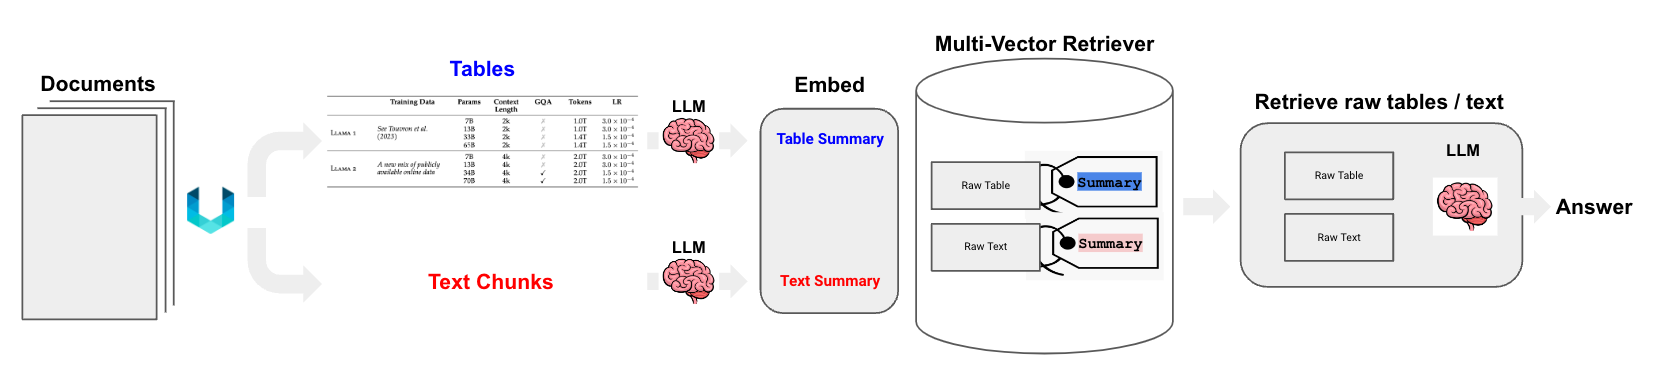

# **3. Creating VectorDB and MultiVector Retriever**
- Here **Index** created on **summarized Text/Table/Image data** to Vector DB **Chroma**
- Then use Langchain **MultiVectorRetriever** to retrive the context of text and image

In [65]:
import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryStore
from langchain_community.vectorstores import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings

##Function: Create retriever that indexes summaries, but returns raw images or texts

In [68]:
def create_multi_vector_retriever(vectorstore, text_summaries, texts, table_summaries, tables, image_summaries, images):
    """
    Create retriever that indexes summaries, but returns raw images or texts

    vectorstore: Initiated ChromaDB Vectore store
    text_summaries: Text summmary
    Text: Raw Text content
    table_summaries: Table  summmary
    Table : Raw Table content
    image_summaries: Image summmary
    img_base64_list : Raw Image content
    """

    # Initialize the storage layer
    store = InMemoryStore()
    id_key = "doc_id"

    # Create the multi-vector retriever- Defining retrival object
    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=store,
        id_key=id_key,
    )


    # Helper function to add documents to the vectorstore and docstore
    # Here it creates blank retriver and adds all emebedding info one by one on Image,Text,Table data
    def add_documents(retriever, doc_summaries, doc_contents):
      """
      retriever: This is retriver function holdes MultiVectorRetriever with vectorestore/index pointing
      doc_summaries: Document summary
      doc_contents: Document Raw Content
      """

      doc_ids = [str(uuid.uuid4()) for _ in doc_contents]

      #It creates Document format with page_content as summary, and metadata info with unique doc id
      summary_docs = [
              Document(page_content=s, metadata={id_key: doc_ids[i]})
              for i, s in enumerate(doc_summaries)
          ]


      retriever.vectorstore.add_documents(summary_docs)   #Embeds and creats index for summary and adds to vectore db
      retriever.docstore.mset(list(zip(doc_ids, doc_contents))) #It attaches metadata info of that summary(id and raw content)

      # Add texts, tables, and images
      # Check that text_summaries is not empty before adding
      if text_summaries:
          add_documents(retriever, text_summaries, texts) #Embeds and creats index for text_summaries and adds texts and embedding to vectore db
      # Check that table_summaries is not empty before adding
      if table_summaries:
          add_documents(retriever, table_summaries, tab)  #Embeds and creats index for table_summaries and adds tables and embedding to vectore db
      # Check that image_summaries is not empty before adding
      if image_summaries:
          add_documents(retriever, image_summaries, img) #Embeds and creats index for image_summaries and adds img and embedding to vectore db

    return retriever  # Returns final cmpletely embedded retriver obj


## Create Chroma vectore db in memory with name - mm_rag by passing OpenAIEmbeddings() or Gemini Embedding

### Invoke Gemini Embedding


In [70]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
embeddings.embed_query("hello, world!")[:10]

[0.05636945,
 0.0048285457,
 -0.0762591,
 -0.023642512,
 0.05329321,
 0.016581405,
 0.0091215875,
 -0.024947558,
 0.007700752,
 0.033625674]

### Create CHROMA Vectoredb by passing Gemini Embedding

In [71]:
# Pass OpenAI embedding
# vectorstore = Chroma(
#     collection_name="mm_rag", embedding_function=OpenAIEmbeddings()
# )

# Pass Gemini embedding
vectorstore = Chroma(
    collection_name="mm_rag", embedding_function=embeddings
)

### Create retrival - **retriever_multi_vector_img**
- It executes above function - **create_multi_vector_retriever**, it applies embedding and creates final retrival

In [72]:
# Create retriever
retriever_multi_vector_img = create_multi_vector_retriever(
    vectorstore,
    text_summaries,
    Text,
    table_summaries,
    Table,
    image_summaries,
    img_base64_list,
)

In [73]:
retriever_multi_vector_img

MultiVectorRetriever(vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x7a0ec85b64a0>, docstore=<langchain_core.stores.InMemoryBaseStore object at 0x7a0ec0443a00>)

### Display Image by its base64 value - plt_img_base64

In [75]:
import io
import re

from IPython.display import HTML, display
from PIL import Image

In [76]:
def plt_img_base64(img_base64):
    """Disply base64 encoded string as image"""
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))



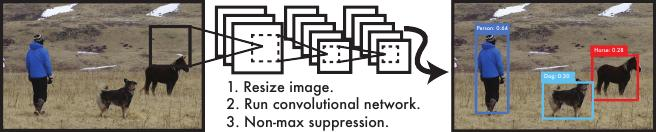

In [77]:
plt_img_base64(img_base64_list[0])

In [78]:
image_summaries[1]

' The image shows a dog and a bicycle. The dog is in front of the bicycle. The bicycle is behind the dog.'

# **4. Create Final RAG**

## Create set of function to process Image

- Check if the string looks like base64"

In [79]:
def looks_like_base64(sb):
    """Check if the string looks like base64"""
    return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None


 - Check if the base64 data is an **image** by looking at the start of the data else its **Table**

In [80]:
def is_image_data(b64data):
    """
    Check if the base64 data is an image by looking at the start of the data
    """
    image_signatures = {
        b"\xFF\xD8\xFF": "jpg",
        b"\x89\x50\x4E\x47\x0D\x0A\x1A\x0A": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data)[:8]  # Decode and get the first 8 bytes
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False

- Resize an image encoded as a Base64 string

In [81]:
def resize_base64_image(base64_string, size=(128, 128)):
    """
    Resize an image encoded as a Base64 string
    """
    # Decode the Base64 string
    img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img_data))

    # Resize the image
    resized_img = img.resize(size, Image.LANCZOS)

    # Save the resized image to a bytes buffer
    buffered = io.BytesIO()
    resized_img.save(buffered, format=img.format)

    # Encode the resized image to Base64
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

## split_image_text_types  - Retrive's I/P Q
- This splits Input as Image or text before passing into Retriver(Chroma db for retrival)

In [86]:
def split_image_text_types(docs):
    """
    Split base64-encoded images and texts
    """
    b64_images = []
    texts = []

    for doc in docs:
        # Check if the document is of type Document and extract page_content if so
        if isinstance(doc, Document):
            doc = doc.page_content
        if looks_like_base64(doc) and is_image_data(doc):
            doc = resize_base64_image(doc, size=(1300, 600))
            b64_images.append(doc)
        else:
            texts.append(doc)

    return {"images": b64_images, "texts": texts}

## img_prompt_func - LLM's feeding I/P Context
- This joins Image and text O/P from Retriver(Chroma db for retrival) before passing to final LLM

In [87]:
def img_prompt_func(data_dict):
    """
    Join the context into a single string
    This joins Image and text O/P from Retriver(Chroma db for retrival) before passing to final LLM

    data_dict: This is Chroma DB retrived context holds text+Image

    """
    #print(data_dict)
    # 1. Here Text contents are joined and saved as single string- formatted_texts
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []

    # Adding image(s) to the messages if present
    # 2. Here for images contents are appended with image_url
    if data_dict["context"]["images"]:
        for image in data_dict["context"]["images"]:
            image_message = {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image}"},
            }
            messages.append(image_message)

    # Adding the text for analysis
    # 3. This is another Prompt using "formatted_texts" of 1st step and creates final text_message
    text_message = {
        "type": "text",
        "text": (
            "You are a helpful assistant.\n"
            "You will be given a mixed info(s) .\n"
            "Use this information to provide relevant information to the user question. \n"
            f"User-provided question: {data_dict['question']}\n\n"
            "Text and / or tables:\n"
            f"{formatted_texts}"
        ),
    }

    # 4. text_message are appended to Image
    messages.append(text_message)

    return [HumanMessage(content=messages)] # Pass this consolidated retrived O/P to Final LLM

## Create final MultiModal RAG

In [89]:
from langchain_core.runnables import RunnableLambda, RunnablePassthrough
# RunnableLambda - This is like python's apply function/lambda , which allows to call function

In [90]:
def multi_modal_rag_chain(retriever):
    """
    Multi-modal RAG chain
    """

    # Multi-modal LLM - OPENAI gpt-4-vision-preview
    #model = ChatOpenAI(temperature=0, model="gpt-4-vision-preview", max_tokens=1024)
    model = ChatGoogleGenerativeAI(model="gemini-pro")


    # RAG pipeline
    chain = (
        {
            "context": retriever | RunnableLambda(split_image_text_types), #User Q passed to split_image_text_types and passed to retriver
            "question": RunnablePassthrough(), #User Q
        }
        | RunnableLambda(img_prompt_func) #Retrivers O/P passed to img_prompt_func,  This joins Image and text O/P from Retriver(Chroma db for retrival) before passing to final LLM
        | model  #MultiModal either GPT 4 vision or Gemini pro vision
        | StrOutputParser()
    )

    return chain

In [91]:
# Create RAG chain
chain_multimodal_rag = multi_modal_rag_chain(retriever_multi_vector_img)

In [92]:
chain_multimodal_rag

{
  context: MultiVectorRetriever(vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x7a0ec85b64a0>, docstore=<langchain_core.stores.InMemoryBaseStore object at 0x7a0ec0443a00>)
           | RunnableLambda(split_image_text_types),
  question: RunnablePassthrough()
}
| RunnableLambda(img_prompt_func)
| ChatGoogleGenerativeAI(model='gemini-pro', client=genai.GenerativeModel(
      model_name='models/gemini-pro',
      generation_config={},
      safety_settings={},
      tools=None,
      system_instruction=None,
  ))
| StrOutputParser()

# **5.1 Validate the Retriver**

In [93]:
# Check retrieval
#query = "Why We combine a pre-trained retriever (Query Encoder + Document Index) with a pre-trained seq2seq model (Generator) and fine-tune end-to-end?"
query = "Explain Unified Detection"
docs = retriever_multi_vector_img.invoke(query)



In [94]:
docs

[]

In [95]:
# query="Open-Domain QA Test Scores. For TQA,\
# left column uses the standard test set for Open-\
# Domain QA, right column uses the TQA-Wiki\
# test set. See Appendix D for further details."
query="Explain Yolo"

In [96]:
docs = retriever_multi_vector_img.invoke(query)

In [97]:
docs

[]

In [110]:
query="Combining Fast R-CNN and YOLO"

In [111]:
retriever_multi_vector_img.invoke(query)

[]

In [112]:
retriever_multi_vector_img

MultiVectorRetriever(vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x7a0ec85b64a0>, docstore=<langchain_core.stores.InMemoryBaseStore object at 0x7a0ec0443a00>)

In [100]:
# We get back relevant images
plt_img_base64(docs)

# **5.2 Validate the Final RAG Chain**

In [108]:
# query="can you explain me this Left: NQ performance as more documents are retrieved. Center: Retrieval recall performance\
# in NQ. Right: MS-MARCO Bleu-1 and Rouge-L as more documents are retrieved."
# query="Explain Unified Detection"
query="Combining Fast R-CNN and YOLO"

In [109]:
# Run RAG chain
chain_multimodal_rag.invoke(query)

'**Combining Fast R-CNN and YOLO**\n\nFast R-CNN and YOLO are two popular object detection algorithms. Fast R-CNN is a region-based object detection algorithm, while YOLO is a single-shot object detection algorithm.\n\nCombining Fast R-CNN and YOLO can improve the accuracy and speed of object detection. Fast R-CNN is more accurate than YOLO, but it is also slower. YOLO is faster than Fast R-CNN, but it is less accurate. By combining the two algorithms, it is possible to achieve both high accuracy and speed.\n\nThere are several ways to combine Fast R-CNN and YOLO. One way is to use the output of Fast R-CNN to generate the input for YOLO. This approach can improve the accuracy of YOLO, as it can use the more accurate bounding boxes generated by Fast R-CNN.\n\nAnother way to combine Fast R-CNN and YOLO is to use the two algorithms in parallel. This approach can improve the speed of object detection, as it can use the faster YOLO algorithm to detect objects in the image. The output of YOL

In [113]:
query1="Explain Yolo with Image"

In [114]:
# Run RAG chain
chain_multimodal_rag.invoke(query1)

'**What is YOLO?**\n\nYOLO (You Only Look Once) is a real-time object detection algorithm that has become popular due to its speed and accuracy. It was developed by Joseph Redmon and Ali Farhadi at the University of Washington in 2015.\n\n**How does YOLO work?**\n\nYOLO divides the input image into a grid of cells. Each cell is responsible for predicting the presence of an object and its bounding box. The algorithm then uses a single convolutional neural network (CNN) to process the entire image at once, making it very fast.\n\n**Advantages of YOLO:**\n\n* **Speed:** YOLO is one of the fastest object detection algorithms, making it suitable for real-time applications.\n* **Accuracy:** YOLO is also highly accurate, achieving state-of-the-art results on many object detection benchmarks.\n* **Simplicity:** YOLO is relatively simple to implement and train, compared to other object detection algorithms.\n\n**Applications of YOLO:**\n\nYOLO has a wide range of applications, including:\n\n* *

In [115]:
query2="What is 100Hz DPM mAP value"
# Run RAG chain
chain_multimodal_rag.invoke(query2)

'The provided context does not mention anything about 100Hz DPM mAP value, so I cannot extract the requested data from the provided context.'

# **END**